In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
def print_null(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Total duplicated data: ", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = (['Null Total Data', 'Null Percentage Data'])
    return result
print_null(df)

Total duplicated data:  0


,Null Total Data,Null Percentage Data
Pregnancies,0,0.0%
Glucose,0,0.0%
BloodPressure,0,0.0%
SkinThickness,0,0.0%
Insulin,0,0.0%
BMI,0,0.0%
DiabetesPedigreeFunction,0,0.0%
Age,0,0.0%
Outcome,0,0.0%


**We don't have any missing values. Let's continue with Data Visualization**

In [4]:
df_selected_dtypes = df.select_dtypes(include=['int64', 'float64'])

------------------------------
Variable:  {'Pregnancies'}
Skew = 0.9016739791518588
Kurtosis = 0.15921977754746486


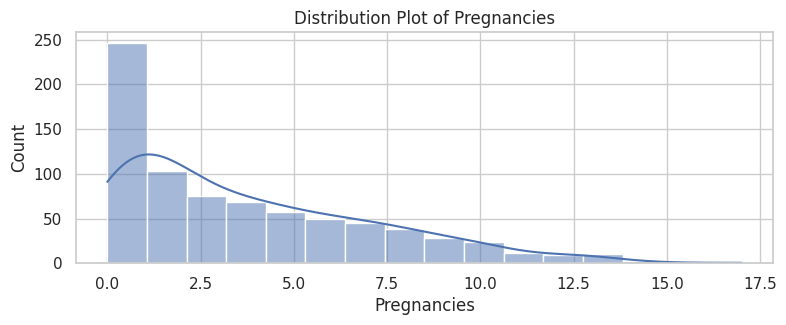

------------------------------
Variable:  {'Glucose'}
Skew = 0.17375350179188992
Kurtosis = 0.6407798203735053


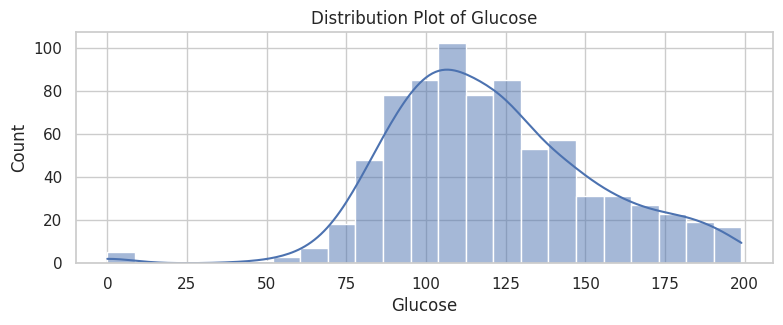

------------------------------
Variable:  {'BloodPressure'}
Skew = -1.8436079833551302
Kurtosis = 5.180156560082496


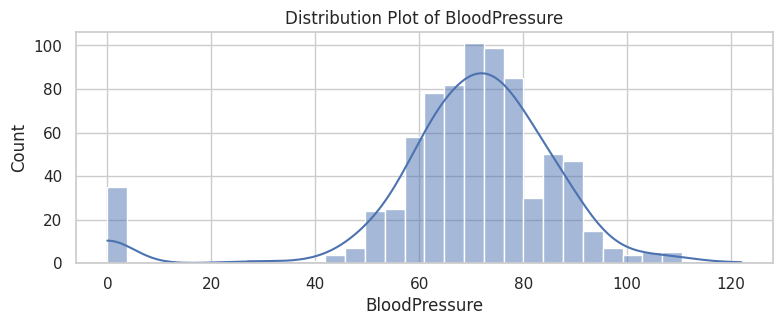

------------------------------
Variable:  {'SkinThickness'}
Skew = 0.10937249648187608
Kurtosis = -0.520071866153013


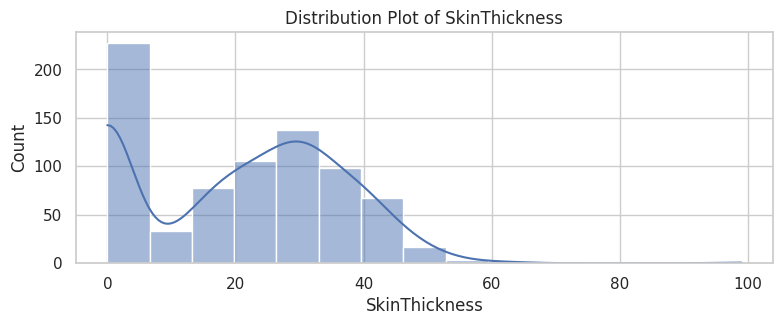

------------------------------
Variable:  {'Insulin'}
Skew = 2.272250858431574
Kurtosis = 7.2142595543487715


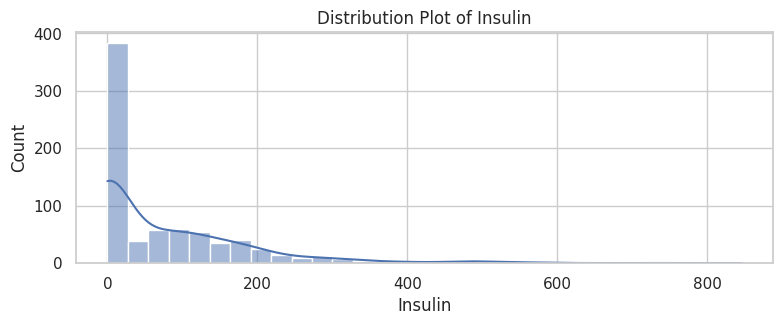

------------------------------
Variable:  {'BMI'}
Skew = -0.42898158845356543
Kurtosis = 3.290442900816981


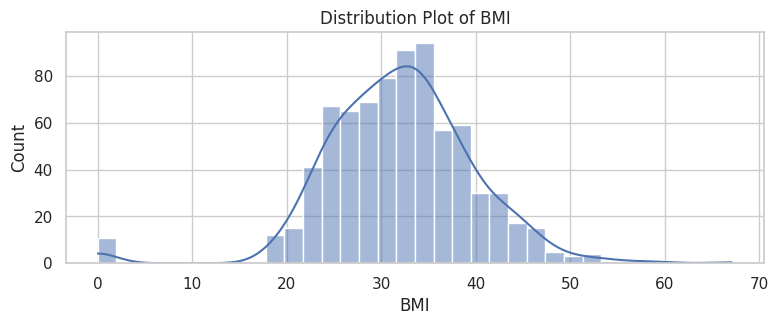

------------------------------
Variable:  {'DiabetesPedigreeFunction'}
Skew = 1.919911066307204
Kurtosis = 5.5949535279830584


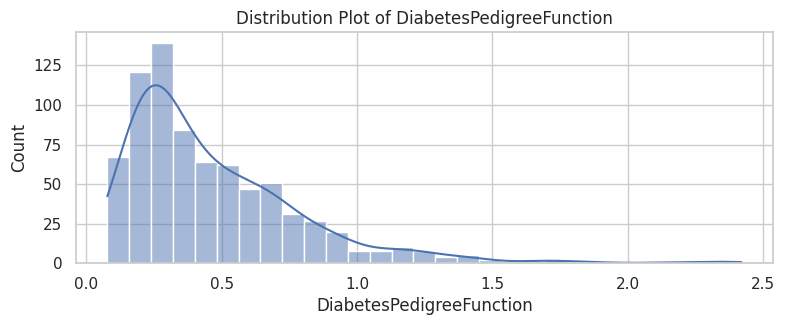

------------------------------
Variable:  {'Age'}
Skew = 1.1295967011444805
Kurtosis = 0.6431588885398942


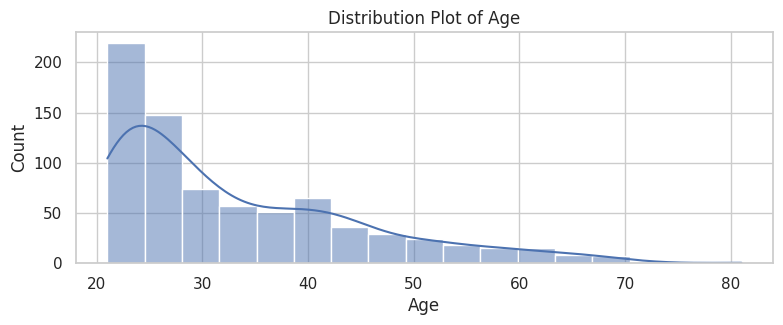

In [5]:
for col in df_selected_dtypes:
    if col == "Outcome":
        continue
    sns.set(style='whitegrid')
    plt.figure(figsize=(9, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution Plot of {col}')
    print('--' * 15)
    print("Variable: ", {col})
    print(f'Skew = {df[col].skew()}')
    print(f'Kurtosis = {df[col].kurt()}')
    plt.show()

In [6]:
def bar_plot(variable):
    plt.figure(figsize=(6, 3))
    sns.barplot(df, x='Outcome', y=variable)
    plt.show()

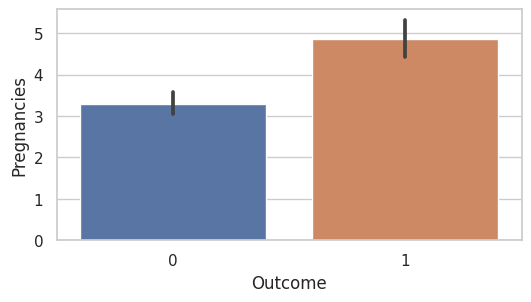

------------------------------------------------------------------------------------------


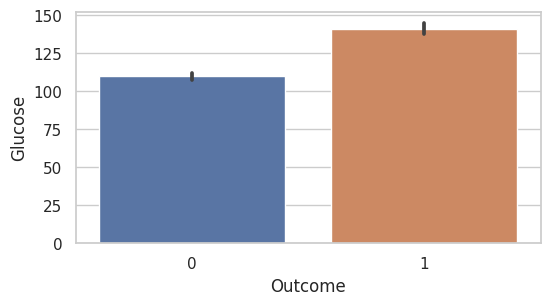

------------------------------------------------------------------------------------------


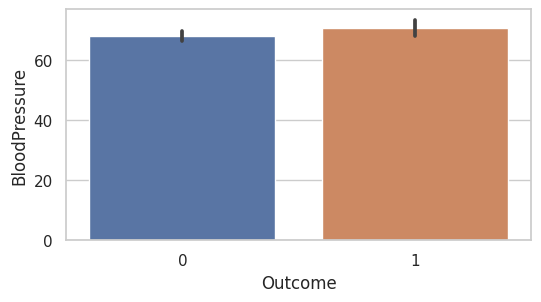

------------------------------------------------------------------------------------------


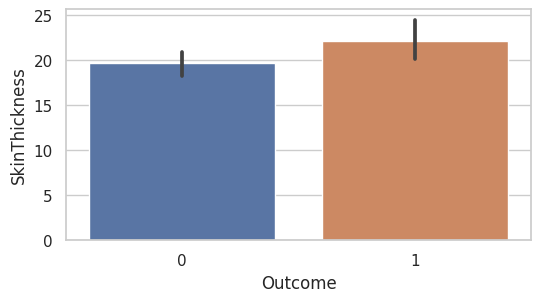

------------------------------------------------------------------------------------------


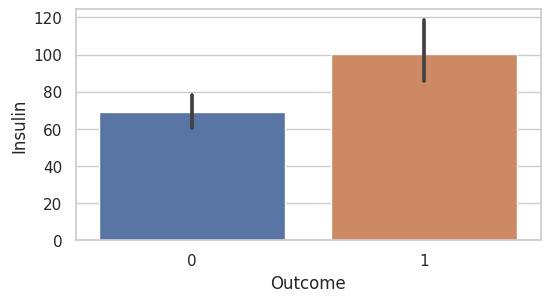

------------------------------------------------------------------------------------------


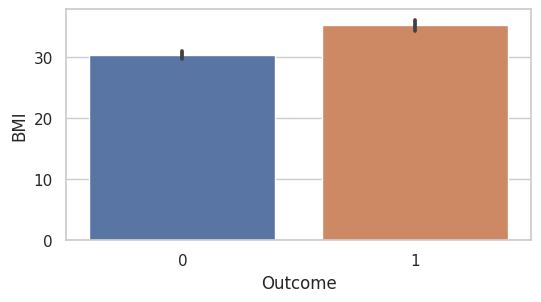

------------------------------------------------------------------------------------------


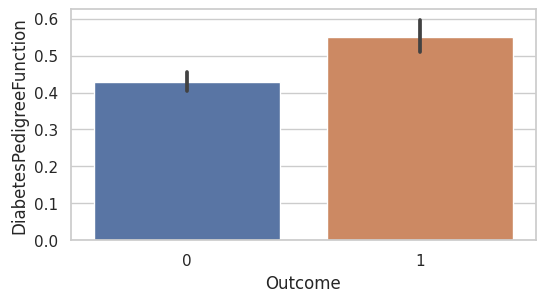

------------------------------------------------------------------------------------------


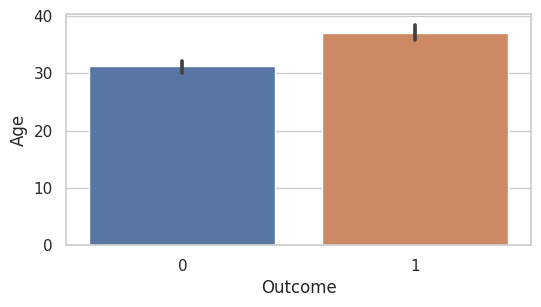

------------------------------------------------------------------------------------------


In [7]:
for i in df_selected_dtypes:
    if i == "Outcome":
        continue
    bar_plot(i)
    print("---" *30)

In [8]:
def box_plot(variable):
    plt.figure(figsize=(5, 3))
    sns.boxplot(df, x='Outcome', y=variable)
    plt.show()

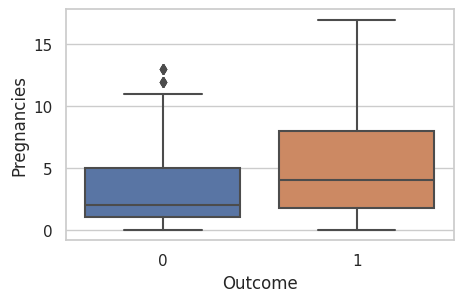

------------------------------------------------------------------------------------------


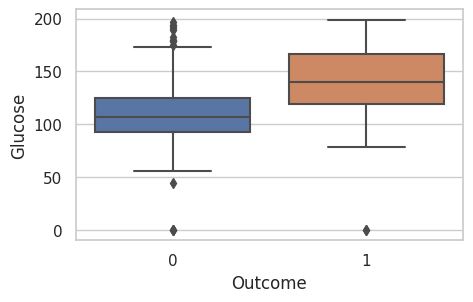

------------------------------------------------------------------------------------------


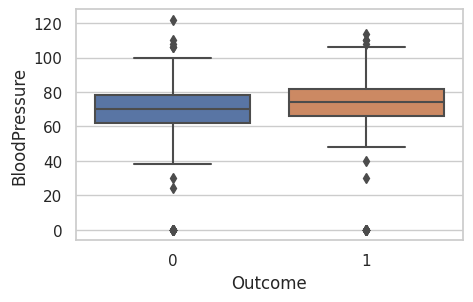

------------------------------------------------------------------------------------------


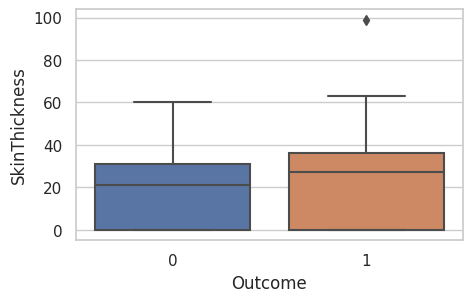

------------------------------------------------------------------------------------------


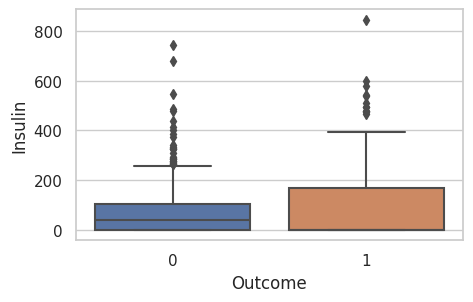

------------------------------------------------------------------------------------------


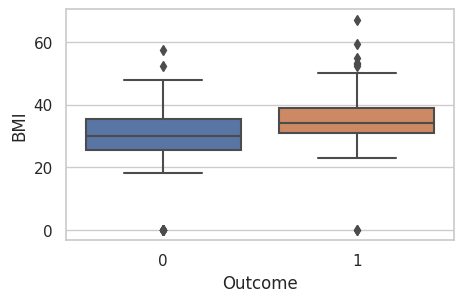

------------------------------------------------------------------------------------------


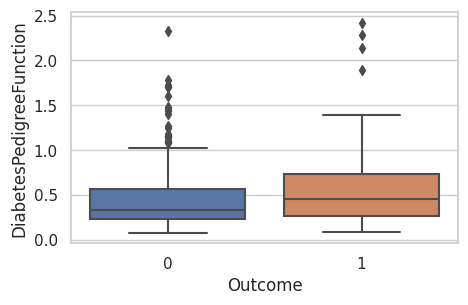

------------------------------------------------------------------------------------------


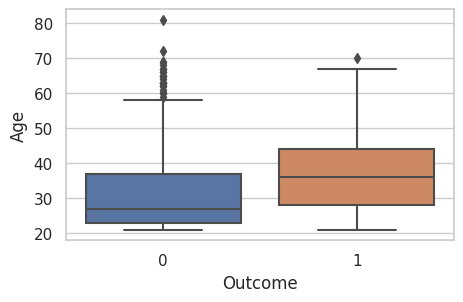

------------------------------------------------------------------------------------------


In [9]:
for i in df_selected_dtypes:
    if i == "Outcome":
        continue
    box_plot(i)
    print("---" *30)

In [10]:
g = px.pie(df, names='Outcome', hole=.5, title='Outcome Count by 0 and 1')
g.update_traces(textinfo='percent+value', textposition='inside')
g.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Find outliers**

In [12]:
from collections import Counter

In [13]:
def detect_outliers(data, features):
    outlier_indices = []
    for i in features:
        Q1 = np.percentile(data[i], 25)
        Q3 = np.percentile(data[i], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5
        outlier_list_columns = data[(data[i] < Q1 - outlier_step) & (data[i] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_columns)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    if len(outlier_indices) == 0:
        print("NaN outlier")
    else:
        print("Total outlier count: ", len(outlier_indices))
    return multiple_outliers

In [14]:
detect_outliers(df, df_selected_dtypes)

NaN outlier


[]

**We don't have any outlier value**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
sc.fit(X)
X = sc.transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

**Loading models to find best parameters with Grid Search Cross Validation**

In [20]:
SEED = 42
classifier = [LogisticRegression(random_state=SEED),
              RandomForestClassifier(random_state=SEED),
              SVC(random_state=SEED, probability=True),
              KNeighborsClassifier(),
              AdaBoostClassifier(random_state=SEED),
              GradientBoostingClassifier(random_state=SEED),
              DecisionTreeClassifier(random_state=SEED),
              XGBClassifier(random_state=SEED)
              ]
xgb_param_grid = {'booster': ['gbtree', 'dart'],
                  'gamma': np.arange(1, 10, 2, dtype=int),
                  'max_depth': [1, 20, 50],
                  "n_estimators": [100, 300]
                  }

dt_param_grid = {"min_samples_split": range(10, 500, 20),
                 "max_depth": range(1, 20, 2)
                 }
svc_param_grid = {'kernel': ['rbf'],
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300, 100, 1000]
                  }
rf_param_grid = {'max_features': [1, 3, 10],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [False],
                 'n_estimators': [100, 300],
                 'criterion': ['gini']
                 }
logreg_param_grid = {'C': np.logspace(-3, 3, 7),
                     'penalty': ['l1', 'l2', 'elasticnet'],
                     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                     
                     }

knn_param_grid = {'n_neighbors': np.linspace(1, 19, 10, dtype=int).tolist(),
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']
                  }
ada_param_grid = {"n_estimators": [100, 300],
                  "learning_rate": [0.001, 0.01, 0.1, 1]
                  }

gradient_param_grid = {'max_depth': [2, 3, 4, 5, 10],
                       'min_samples_leaf': [40, 45, 50, 55],
                       'max_features': [0.05, 0.1, 0.2]
                       }

classifier_param = [
    logreg_param_grid,
    rf_param_grid,
    svc_param_grid,
    knn_param_grid,
    ada_param_grid,
    gradient_param_grid,
    dt_param_grid,
    xgb_param_grid
]
cv_results = []
best_estimators = []
results = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], classifier_param[i], cv=10, verbose=1, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    results.append({"Algorithm": classifier[i], "Best Estimators": best_estimators[i], "Accuracy": cv_results[i]})

results = pd.DataFrame(results)
results.sort_values(by='Accuracy', ascending=False)
results

Fitting 10 folds for each of 126 candidates, totalling 1260 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Fitting 10 folds for each of 60 candidates, totalling 600 fits


,Algorithm,Best Estimators,Accuracy
0,LogisticRegression(random_state=42),"LogisticRegression(C=0.1, random_state=42)",0.782110
1,RandomForestClassifier(random_state=42),"(DecisionTreeClassifier(max_features=3, min_sa...",0.780119
2,"SVC(probability=True, random_state=42)","SVC(C=200, gamma=0.001, probability=True, rand...",0.782041
3,KNeighborsClassifier(),"KNeighborsClassifier(metric='manhattan', n_nei...",0.785989
4,AdaBoostClassifier(random_state=42),"(DecisionTreeClassifier(max_depth=1, random_st...",0.780084
5,GradientBoostingClassifier(random_state=42),([DecisionTreeRegressor(criterion='friedman_ms...,0.778407
6,DecisionTreeClassifier(random_state=42),"DecisionTreeClassifier(max_depth=5, min_sample...",0.763382
7,"XGBClassifier(base_score=None, booster=None, c...","XGBClassifier(base_score=None, booster='gbtree...",0.776345


In [21]:
votingC = VotingClassifier(estimators=[('logreg', best_estimators[0]),
                                       ('rf', best_estimators[1]),
                                       ('svc', best_estimators[2]),
                                       ('knn', best_estimators[3]),
                                       ("ada", best_estimators[4])
                                       ], voting='soft', n_jobs=-1, verbose=1)
votingC.fit(X_train, y_train)
y_pred = votingC.predict(X_test)
print(accuracy_score(y_pred, y_test)*100)

76.19047619047619


**Thanks for inspecting the my notebook! Im newbie here. If u have any advices or questions let meet in comments. :)**